In [117]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline


In [118]:
df = pd.read_csv('data/데이터.csv', encoding='euc-kr')
df.tail(10)

,Cstno,Age,Sex,Income,USE_Month,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
10117,712503408,57,M,6~8천만원미만,40,17925000,17498000,111
10118,713755458,50,M,6~8천만원미만,36,9959000,10310000,63
10119,716893683,55,F,Unknown,47,14657000,6009000,53
10120,710841183,54,M,4~6천만원미만,34,13940000,15577000,114
10121,713899383,56,F,2천만원미만,50,3688000,14596000,120
10122,772366833,50,M,2~4천만원미만,40,4003000,15476000,117
10123,710638233,41,M,2~4천만원미만,25,4277000,8764000,69
10124,716506083,44,F,2천만원미만,36,5409000,10291000,60
10125,717406983,30,M,2~4천만원미만,36,5281000,8395000,62
10126,714337233,43,F,2천만원미만,25,10388000,10294000,61


In [119]:
len(df)

10127

In [120]:
type(df['Sex'])

pandas.core.series.Series

In [121]:
import math

In [122]:
inform1_df = df[['Sex', 'Total_Trans_Amt']]
inform1_df

,Sex,Total_Trans_Amt
0,M,1144000
1,F,1291000
2,M,1887000
3,F,1171000
4,M,816000
...,...,...
10122,M,15476000
10123,M,8764000
10124,F,10291000
10125,M,8395000


In [123]:
infoage_series = df.Age.dropna().apply(lambda age: math.floor(age / 10) * 10)
age_series.name = "Age_Group"

In [124]:
inform1_df = pd.concat(
    [inform1_df, age_series],
    axis=1,)

In [125]:
inform1_df

,Sex,Total_Trans_Amt,Age_Group
0,M,1144000,40
1,F,1291000,40
2,M,1887000,50
3,F,1171000,40
4,M,816000,40
...,...,...,...
10122,M,15476000,50
10123,M,8764000,40
10124,F,10291000,40
10125,M,8395000,30


In [126]:
inform1_df['Use_Amt'] = ' '
inform1_df

,Sex,Total_Trans_Amt,Age_Group,Use_Amt
0,M,1144000,40,
1,F,1291000,40,
2,M,1887000,50,
3,F,1171000,40,
4,M,816000,40,
...,...,...,...,...
10122,M,15476000,50,
10123,M,8764000,40,
10124,F,10291000,40,
10125,M,8395000,30,


In [127]:
for i in np.arange(len(df)):
    if inform1_df['Total_Trans_Amt'].values[i] < 1500000:
        inform1_df['Use_Amt'].values[i] = '1' 
    elif inform1_df['Total_Trans_Amt'].values[i] < 3000000:
        inform1_df['Use_Amt'].values[i] = '2'
    elif inform1_df['Total_Trans_Amt'].values[i] < 4500000:
        inform1_df['Use_Amt'].values[i] = '3'
    elif inform1_df['Total_Trans_Amt'].values[i] < 7000000:
        inform1_df['Use_Amt'].values[i] = '4'
#     elif inform_df['Total_Trans_Amt'].values[i] < 10000000:
#         inform_df['Range'].values[i] = 'E'
    else: inform1_df['Use_Amt'].values[i] = '5'
        

In [128]:
inform1_df

,Sex,Total_Trans_Amt,Age_Group,Use_Amt
0,M,1144000,40,1
1,F,1291000,40,1
2,M,1887000,50,2
3,F,1171000,40,1
4,M,816000,40,1
...,...,...,...,...
10122,M,15476000,50,5
10123,M,8764000,40,5
10124,F,10291000,40,5
10125,M,8395000,30,5


In [129]:
from functools import *

In [130]:
def count_columns(result_dic, element) :
    if result_dic.get(element) :
        result_dic[element] += 1
    else:
        result_dic[element] = 1

    return result_dic

def get_group_count(df_column) :
    return reduce(count_columns, df_column, dict())

In [131]:
result = get_group_count(inform1_df['Sex'])
result

{'M': 4769, 'F': 5358}

In [132]:
result = get_group_count(inform1_df['Age_Group'])
result

{40: 4561, 50: 2998, 30: 1841, 60: 530, 70: 2, 20: 195}

In [133]:
result = get_group_count(inform1_df['Use_Amt'])
result

{'1': 1010, '2': 2885, '3': 2938, '4': 1869, '5': 1425}

In [134]:
idx = 0
inform1_df_columns_sex = []

element = inform1_df['Sex'][idx], inform1_df['Use_Amt']

inform1_df_columns_sex.append(element)
inform1_df_columns_sex

[('M',
  0        1
  1        1
  2        2
  3        1
  4        1
          ..
  10122    5
  10123    5
  10124    5
  10125    5
  10126    5
  Name: Use_Amt, Length: 10127, dtype: object)]

In [135]:
inform1_df_columns_sex = [] # 성별
inform1_df_columns_age = [] # 연령

for idx in range(len(df)):
    element     = inform1_df['Sex'][idx], inform1_df['Use_Amt'][idx]
    age_element = inform1_df['Age_Group'][idx],inform1_df['Use_Amt'][idx]
    
    inform1_df_columns_sex.append(element)
    inform1_df_columns_age.append(age_element)
    
len(inform1_df_columns_sex), len(inform1_df_columns_age)

(10127, 10127)

In [136]:
inform1_df_columns_sex[:10]

[('M', '1'),
 ('F', '1'),
 ('M', '2'),
 ('F', '1'),
 ('M', '1'),
 ('M', '1'),
 ('M', '1'),
 ('M', '2'),
 ('M', '1'),
 ('M', '1')]

In [137]:
inform1_df_columns_age[:10]

[(40, '1'),
 (40, '1'),
 (50, '2'),
 (40, '1'),
 (40, '1'),
 (40, '1'),
 (50, '1'),
 (30, '2'),
 (30, '1'),
 (40, '1')]

In [148]:
def get_group_count_sex(inform1_df_columns_sex) :
    
    print('len(inform1_df_columns_sex) :', len(inform1_df_columns_sex))
    
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple

        if not (result_dic.get(element1)) :
            result_dic[element1] = {}
              
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result_sex = reduce(count_columns, inform1_df_columns_sex, dict())
    return result_sex

In [149]:
def get_group_count_age(inform1_df_columns_age) :
    
    print('len(inform1_df_columns_age) :', len(inform1_df_columns_age))
    
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple

        if not (result_dic.get(element1)) :
            result_dic[element1] = {}
              
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result_age = reduce(count_columns, inform1_df_columns_age, dict())
    return result_age

In [154]:
result_sex = get_group_count_sex(inform1_df_columns)

len(inform1_df_columns_sex) : 10127


In [155]:
result_age = get_group_count_age(inform1_df_columns_age)

len(inform1_df_columns_age) : 10127


In [157]:
result_sex, result_age

({'M': {'1': 619, '2': 1467, '3': 1299, '4': 509, '5': 875},
  'F': {'1': 391, '2': 1418, '3': 1639, '4': 1360, '5': 550}},
 {40: {'1': 407, '2': 933, '3': 1584, '4': 936, '5': 701},
  50: {'2': 773, '1': 414, '3': 809, '4': 595, '5': 407},
  30: {'2': 890, '1': 87, '3': 362, '4': 251, '5': 251},
  60: {'1': 95, '2': 167, '3': 158, '4': 71, '5': 39},
  70: {'2': 1, '1': 1},
  20: {'2': 121, '3': 25, '1': 6, '4': 16, '5': 27}})

In [166]:
dict_element_F = result_sex['F']
dict_element_F

{'1': 391, '2': 1418, '3': 1639, '4': 1360, '5': 550}

In [167]:
dict_values_F = [dict_element[key] for key in dict_element.keys()]
dict_values_F

[391, 1418, 1639, 1360, 550]

In [168]:
sum(dict_values_F)

5358

In [171]:
dict_element_M = result_sex['M']
dict_element_M

{'1': 619, '2': 1467, '3': 1299, '4': 509, '5': 875}

In [173]:
dict_values_M = [dict_element_M[key] for key in dict_element_M.keys()]
dict_values_M

[619, 1467, 1299, 509, 875]

In [174]:
dict_values_M = [dict_element_M[key] for key in dict_element_M.keys()]
dict_values_M

[619, 1467, 1299, 509, 875]

In [182]:
dict_element_20 = result_age[20]
dict_element_30 = result_age[30]
dict_element_40 = result_age[40]
dict_element_50 = result_age[50]
dict_element_60 = result_age[60]
dict_element_70 = result_age[70]

dict_element_20, dict_element_30, dict_element_40, dict_element_50,dict_element_60, dict_element_70

({'2': 121, '3': 25, '1': 6, '4': 16, '5': 27},
 {'2': 890, '1': 87, '3': 362, '4': 251, '5': 251},
 {'1': 407, '2': 933, '3': 1584, '4': 936, '5': 701},
 {'2': 773, '1': 414, '3': 809, '4': 595, '5': 407},
 {'1': 95, '2': 167, '3': 158, '4': 71, '5': 39},
 {'2': 1, '1': 1})

In [186]:
dict_values_20 = [dict_element_20[key] for key in dict_element_20.keys()]
dict_values_30 = [dict_element_30[key] for key in dict_element_30.keys()]
dict_values_40 = [dict_element_40[key] for key in dict_element_40.keys()]
dict_values_50 = [dict_element_50[key] for key in dict_element_50.keys()]
dict_values_60 = [dict_element_60[key] for key in dict_element_60.keys()]
dict_values_70 = [dict_element_70[key] for key in dict_element_70.keys()]

dict_values_20, dict_values_30, dict_values_40, dict_values_50, dict_values_60, dict_values_70

([121, 25, 6, 16, 27],
 [890, 87, 362, 251, 251],
 [407, 933, 1584, 936, 701],
 [773, 414, 809, 595, 407],
 [95, 167, 158, 71, 39],
 [1, 1])

In [187]:
count_f = []
count_m = []

for i in range(5):
#     idx = i+1
    count_f.append(dict_values_F[i])
    count_m.append(dict_values_M[i])

In [188]:
count_f, count_m

([391, 1418, 1639, 1360, 550], [619, 1467, 1299, 509, 875])

In [210]:
count_20 = []
count_30 = []
count_40 = []
count_50 = []
count_60 = []
count_70 = []

for i in range(5):
#     idx = i+1
    count_20.append(dict_values_20[i])
    count_30.append(dict_values_30[i])
    count_40.append(dict_values_40[i])
    count_50.append(dict_values_50[i])
    count_60.append(dict_values_60[i])

for i in range(2):
    count_70.append(dict_values_70[i])


if len(count_70) < 5:
    for i in range(5-len(count_70)):
        count_70.append(0)

In [212]:
len(count_70)

5

In [229]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (12,6)

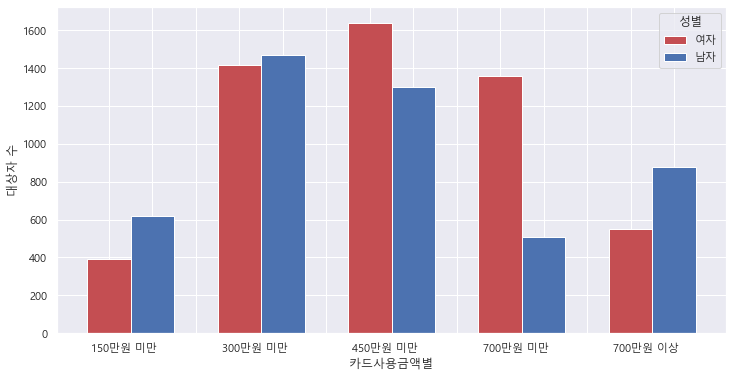

In [230]:
t1 = [1,4,7,10,13]
t2 = [2,5,8,11,14]

plt.bar(t1, count_f, color='r', width=1, label='여자')
plt.bar(t2, count_m, color='b', width=1, label='남자')
plt.xlabel('카드사용금액별')
plt.ylabel('대상자 수')
plt.legend(title='성별')

t = list(range(1,15))
plt.xticks(t , ('        150만원 미만','','','        300만원 미만','','','        450만원 미만','','','        700만원 미만','','','        700만원 이상',''))   # set the locations of the xticks
plt.show()

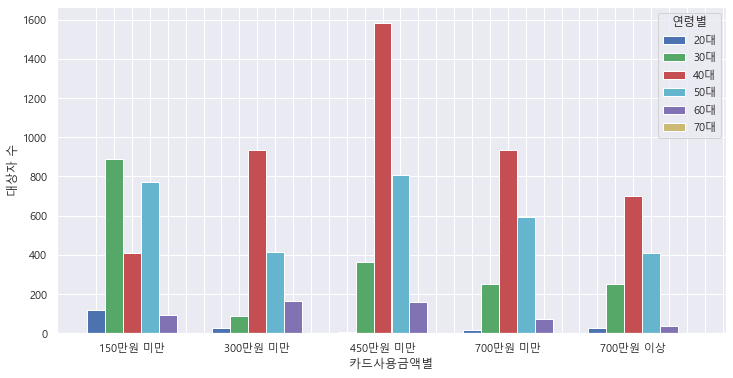

In [237]:
t1 = [1,8,15,22,29]
t2 = [2,9,16,23,30]
t3 = [3,10,17,24,31]
t4 = [4,11,18,25,32]
t5 = [5,12,19,26,33]
t6 = [6,19,20,27,34]

plt.bar(t1, count_20, color='b', width=1, label='20대')
plt.bar(t2, count_30, color='g', width=1, label='30대')
plt.bar(t3, count_40, color='r', width=1, label='40대')
plt.bar(t4, count_50, color='c', width=1, label='50대')
plt.bar(t5, count_60, color='m', width=1, label='60대')
plt.bar(t6, count_70, color='y', width=1, label='70대')

plt.xlabel('카드사용금액별')
plt.ylabel('대상자 수')
plt.legend(title='연령별')

# for i in range(36):
    


t = list(range(1,37))
plt.xticks(t , ('','','150만원 미만','','','','', '','','300만원 미만','','','','', '','','450만원 미만','','','','', '','','700만원 미만','','','','', '','','700만원 이상','','','','',''))   # set the locations of the xticks
plt.show()